## Analysis 2020 Notebook 01

### Question 1: Do we see differences in species abundance and distribution over space and through time between the control and impacted beach areas?

### Question 2: If indeed we do see a difference between the two areas, can these differences be attributed, with reasonable certainty,to nourishment?

possible contributing factors (and variables that might confound)?

spatial<br>
temporal

sand composition<br>
sand grain size domain<br>
compaction<br>
beach width

confounding variables...

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data_path = '../../../data/'
data_file = 'BiologicalCounts.txt'

columns = ['Sheet Code','Transect_Date_Code','datetime','Transect','Sample','Ghost Crabs','Sm Mole Crabs',
        'Med Mole Crabs','Lg Mole Crabs','Coquina Clams','Annelids','Amphipods']

In [3]:
# read data from source file and rework it a bit to get it into shape for anal:
df_ = pd.read_csv(data_path+data_file, sep='\t', header=None, names=columns,
                infer_datetime_format=True)

# convert the date and time string object from the data file to a Py datetime object:
df_['datetime'] =  pd.to_datetime(df_['datetime'], format='%Y-%m-%d')  #  %H:%M:%S

df_['datetime'] = df_["datetime"].dt.strftime('%Y-%m')

# set existing datetime column to be new index:
#df_.set_index(['datetime'], drop=False, inplace=True)

# rename the datetime field (column) to Survey to better reflect meaning:
df_.rename({'datetime':'Survey'}, axis=1, inplace=True)

# drop unneeded fields--jut to get them out of the way:
df_ = df_.drop(['Sheet Code','Transect_Date_Code'], axis=1).copy()

# where there might be empty fields, replace with 0.0:
df_.fillna(value=0, inplace=True)

In [4]:
df_.Survey

836    2017-04
837    2017-04
838    2017-04
839    2017-04
840    2017-04
        ...   
995    2017-08
996    2017-08
997    2017-08
998    2017-08
999    2017-08
Name: Survey, Length: 1111, dtype: object

### Q: What is the behavior of the variance in counts over time in the control and treatment groups?

aggregate transects by Group and then plot against Survey

In [5]:
# aggregate (sum) each transect's three (3) sample replicates to yield a single total count for
# each transect, for each survey:
df = df_.groupby(['Survey','Transect']).agg({'Ghost Crabs':'sum', 'Sm Mole Crabs':'sum', 
                                            'Med Mole Crabs':'sum', 'Lg Mole Crabs':'sum',
                                             'Coquina Clams':'sum', 'Annelids':'sum', 
                                             'Amphipods':'sum'})

df.reset_index(inplace=True)   # level=['Transect'], 

In [6]:
# add a control - impact (treatment) identifier to df:
df.loc[df['Transect'].str[0] == 'C', 'Group'] = 'Control'
df.loc[df['Transect'].str[0] == 'T', 'Group'] =' Impacted'

In [7]:
# okay, so here's what we have in terms of data to play with:
df.columns

Index(['Survey', 'Transect', 'Ghost Crabs', 'Sm Mole Crabs', 'Med Mole Crabs',
       'Lg Mole Crabs', 'Coquina Clams', 'Annelids', 'Amphipods', 'Group'],
      dtype='object')

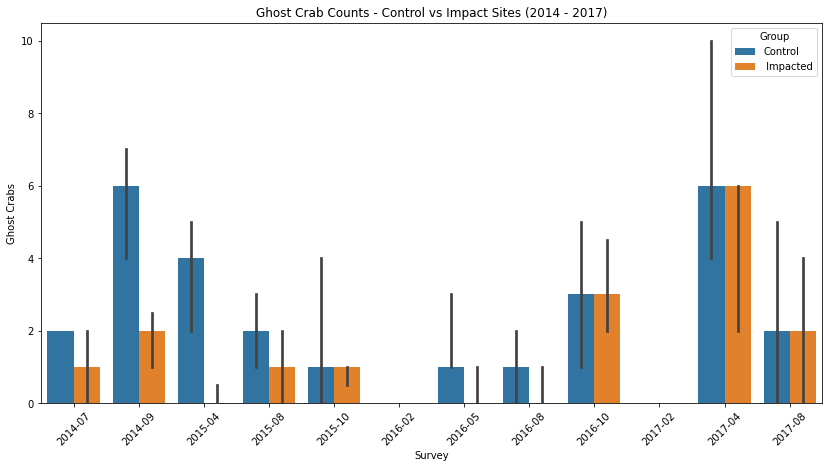

In [17]:
fig01 = plt.figure(figsize=(14,7))
ax00 = fig01.add_subplot(1,1,1)

sns.barplot(x='Survey', y='Ghost Crabs', hue='Group', data=df, estimator=np.median, ci=95, n_boot=2000, ax=ax00)
plt.xticks(rotation=45)
plt.title('Ghost Crab Counts - Control vs Impact Sites (2014 - 2017)');

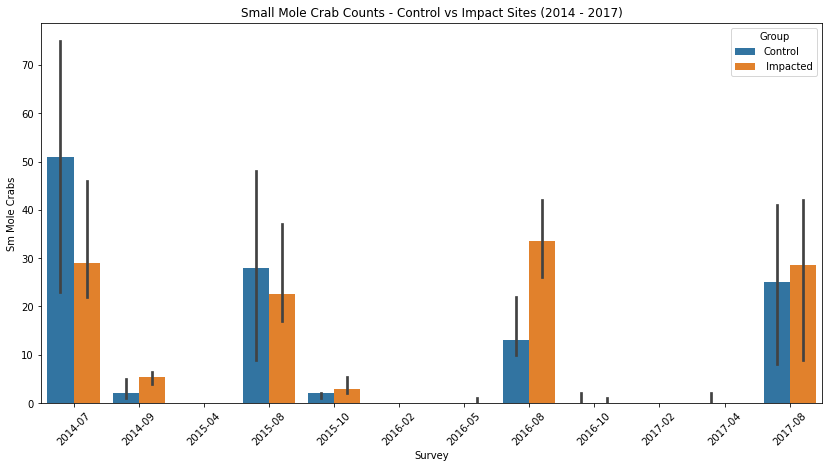

In [18]:
fig02 = plt.figure(figsize=(14,7))
ax00 = fig02.add_subplot(1,1,1)

sns.barplot(x='Survey', y='Sm Mole Crabs', hue='Group', data=df, estimator=np.median, ci=95, n_boot=2000, ax=ax00)
plt.xticks(rotation=45)
plt.title('Small Mole Crab Counts - Control vs Impact Sites (2014 - 2017)');

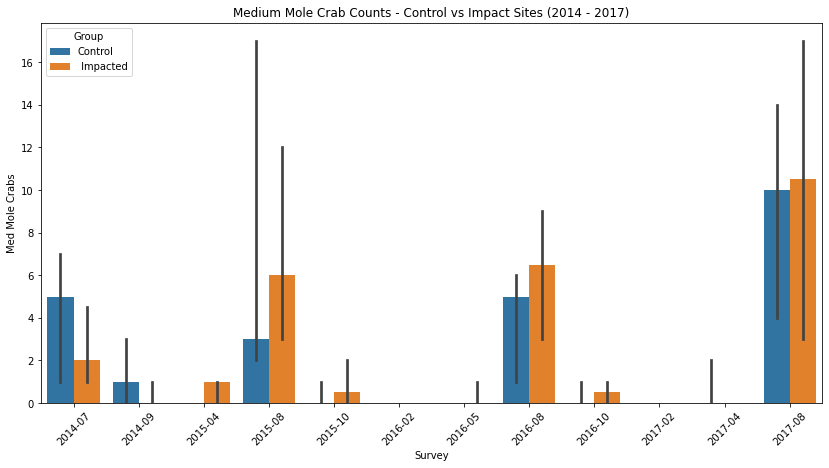

In [21]:
fig03 = plt.figure(figsize=(14,7))
ax00 = fig03.add_subplot(1,1,1)

sns.barplot(x='Survey', y='Med Mole Crabs', hue='Group', data=df, estimator=np.median, ci=95, n_boot=2000, ax=ax00)
plt.xticks(rotation=45)
plt.title('Medium Mole Crab Counts - Control vs Impact Sites (2014 - 2017)');

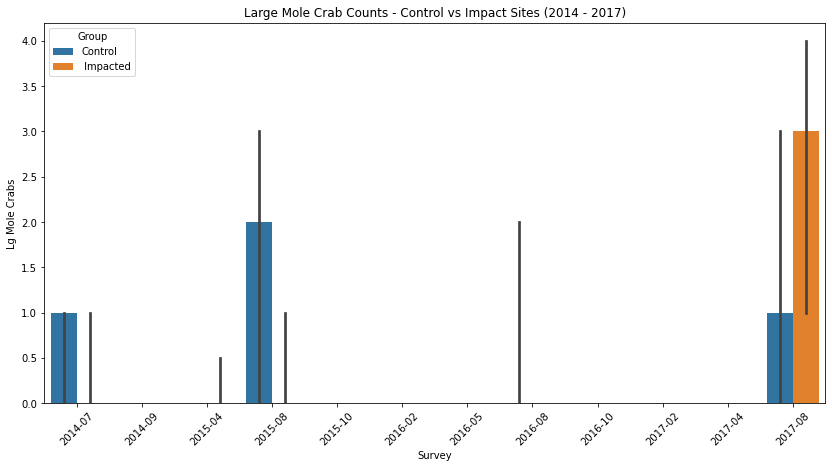

In [22]:
fig04 = plt.figure(figsize=(14,7))
ax00 = fig04.add_subplot(1,1,1)

sns.barplot(x='Survey', y='Lg Mole Crabs', hue='Group', data=df, estimator=np.median, ci=95, n_boot=2000, ax=ax00)
plt.xticks(rotation=45)
plt.title('Large Mole Crab Counts - Control vs Impact Sites (2014 - 2017)');

In [23]:
df.describe()

,Ghost Crabs,Sm Mole Crabs,Med Mole Crabs,Lg Mole Crabs,Coquina Clams,Annelids,Amphipods
count,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000
mean,1.940810,11.760125,2.922118,0.495327,2.000000,0.295950,0.071651
std,2.606408,19.932114,5.703358,1.265211,4.426483,0.963205,0.332378
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,16.000000,3.000000,0.000000,2.000000,0.000000,0.000000
max,20.000000,118.000000,47.000000,9.000000,33.000000,8.000000,3.000000


<Figure size 360x1512 with 0 Axes>

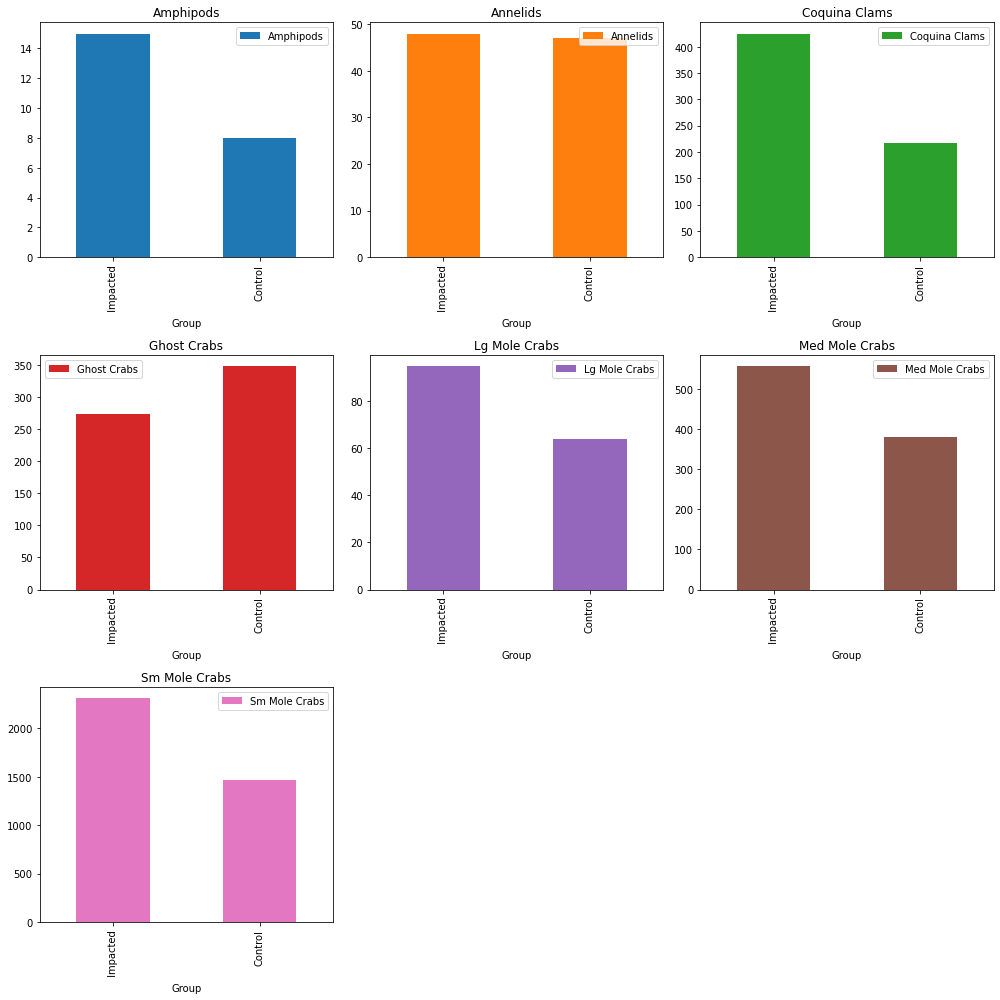

In [20]:
fig00 = plt.figure(figsize=(5,21))
species_summed_by_group.plot(kind='bar', subplots=True, figsize=(14,14), layout=(3,3), sharex=False)
plt.tight_layout();

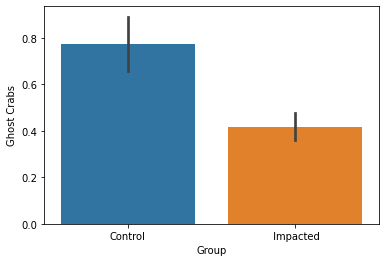

In [46]:
sns.barplot(x='Group',y='Ghost Crabs', data=df, ci=95)

In [130]:
# aggregate (sum) each transect's three (3) sample replicates to yield a single total count for
# each transect, for each survey:
df_variance = df_.groupby(['Survey','Transect']).std()

df_variance.reset_index(inplace=True)

# add a control - impact (treatment) identifier to df:
df_variance.loc[df_variance['Transect'].str[0] == 'C', 'Group'] = 'Control'
df_variance.loc[df_variance['Transect'].str[0] == 'T', 'Group'] =' Impacted'

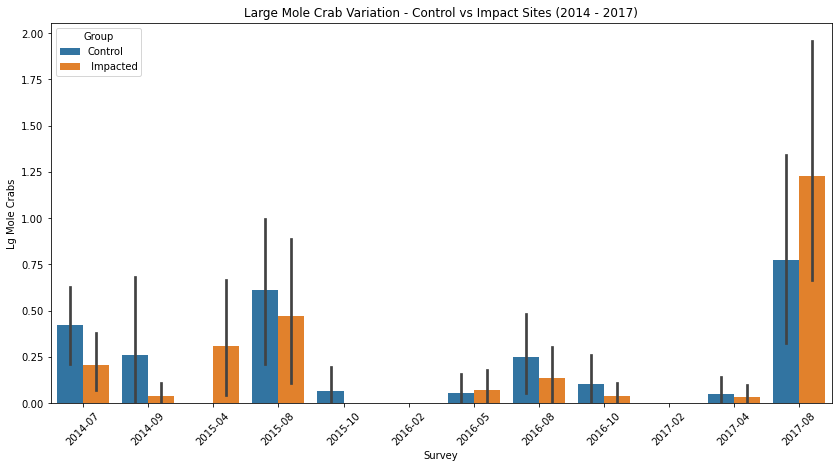

In [128]:
fig10 = plt.figure(figsize=(14,7))
ax00 = fig10.add_subplot(1,1,1)

sns.barplot(x='Survey', y='Lg Mole Crabs', hue='Group', data=df_variance, ci=95, ax=ax00)
plt.xticks(rotation=45)
plt.title('Large Mole Crab Variation - Control vs Impact Sites (2014 - 2017)');

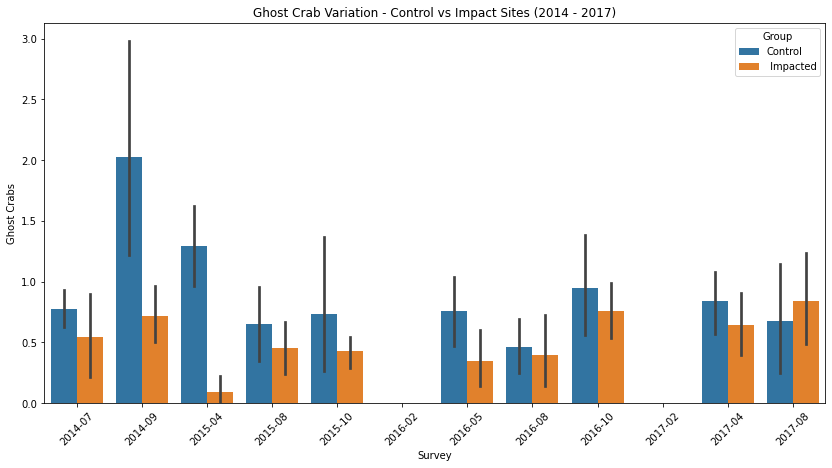

In [131]:
fig11 = plt.figure(figsize=(14,7))
ax00 = fig11.add_subplot(1,1,1)

sns.barplot(x='Survey', y='Ghost Crabs', hue='Group', data=df_variance, ci=95, ax=ax00)
plt.xticks(rotation=45)
plt.title('Ghost Crab Variation - Control vs Impact Sites (2014 - 2017)');

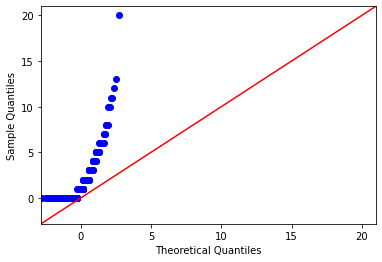

In [138]:
import statsmodels.api as sm

sm.qqplot(df['Ghost Crabs'], line='45');

In [162]:

df.reset_index(inplace=True)   # level=['Transect'], 

# aggregate species counts for the three samples taken at each transect, by survey:
species_summed_by_survey = pd.pivot_table(df, values=['Ghost Crabs','Sm Mole Crabs',
                                       'Med Mole Crabs','Lg Mole Crabs',
                                       'Coquina Clams','Annelids','Amphipods'],
                                       index=['Survey','Transect'],
                                       aggfunc=np.sum)

In [163]:
species_summed_by_survey

Amphipods  Annelids  Coquina Clams  Ghost Crabs  \
Survey Transect                                                    
22016  C1              0.0       0.0            0.0          0.0   
       C10             0.0       0.0            0.0          0.0   
       C11             0.0       0.0            0.0          0.0   
       C2              0.0       0.0            0.0          0.0   
       C3              0.0       0.0            0.0          0.0   
...                    ...       ...            ...          ...   
102016 T5              0.0       0.0            0.0          2.0   
       T6              0.0       0.0            1.0          2.0   
       T7              0.0       0.0            2.0          2.0   
       T8              0.0       0.0            1.0          8.0   
       T9              0.0       0.0            3.0          5.0   

                 Lg Mole Crabs  Med Mole Crabs  Sm Mole Crabs  
Survey Transect                                                
22016  C1                  0.0             0.0            0.0  
       C10                 0.0             0.0            0.0  
       C11                 0.0             0.0            0.0  
       C2                  0.0             0.0            0.0  
       C3                  0.0             0.0            0.0  
...                        ...             ...            ...  
102016 T5                  0.0             1.0            0.0  
       T6                  0.0             0.0            0.0  
       T7                  0.0             1.0            6.0  
       T8                  0.0             0.0            0.0  
       T9                  0.0             0.0            0.0  

[321 rows x 7 columns]

In [ ]:


# extract month and year from new datetime object and add both as new columna:
df_['Year'] = df_['datetime'].dt.year
df_['Month'] = df_['datetime'].dt.month

# create a composite 'survey' field from month and year to uniquely id each field survey:
df_['Survey'] = df_['Month']*10000 + df_['Year']


